# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Leitura do arquivo

In [2]:
df = pd.read_csv("/content/Ecommerce_Consumer_Behavior_Analysis_Data.csv")

# Conhecendo os Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [5]:
print(df.describe())

               Age  Frequency_of_Purchase  Brand_Loyalty  Product_Rating  \
count  1000.000000            1000.000000    1000.000000     1000.000000   
mean     34.304000               6.945000       3.026000        3.033000   
std       9.353238               3.147361       1.416803        1.436654   
min      18.000000               2.000000       1.000000        1.000000   
25%      26.000000               4.000000       2.000000        2.000000   
50%      34.500000               7.000000       3.000000        3.000000   
75%      42.000000              10.000000       4.000000        4.000000   
max      50.000000              12.000000       5.000000        5.000000   

       Time_Spent_on_Product_Research(hours)  Return_Rate  \
count                            1000.000000  1000.000000   
mean                                1.013030     0.954000   
std                                 0.791802     0.810272   
min                                 0.000000     0.000000   
25%       

# Limpeza e tratamento dos dados


In [6]:
df.duplicated().sum()   # Verificando duplicadas

np.int64(0)

In [7]:
df.isnull().sum()  # Verificando dados ausentes

,0
Customer_ID,0
Age,0
Gender,0
Income_Level,0
Marital_Status,0
Education_Level,0
Occupation,0
Location,0
Purchase_Category,0
Purchase_Amount,0


In [8]:
df[df["Engagement_with_Ads"].isnull()]   # Investigando os dados ausentes

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
5,82-561-4233,45,Male,Middle,Married,Master's,High,Boro Utara,Office Supplies,$487.95,...,3,NaN,Tablet,Debit Card,3/19/2024,False,False,Planned,No Preference,7
7,88-661-4689,39,Male,Middle,Single,High School,Middle,Taocheng,Books,$218.06,...,9,NaN,Desktop,Credit Card,3/17/2024,False,True,Impulsive,No Preference,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,10-079-8237,46,Female,High,Widowed,Master's,High,Hejiang,Mobile Accessories,$309.53,...,6,NaN,Smartphone,Cash,4/14/2024,False,True,Planned,Standard,5
989,54-238-5459,40,Female,High,Widowed,High School,High,Xinzhou,Jewelry & Accessories,$149.52,...,6,NaN,Smartphone,Cash,3/10/2024,False,False,Wants-based,No Preference,8
990,85-922-0190,19,Female,High,Widowed,Bachelor's,High,Nanfeng,Toys & Games,$206.32,...,4,NaN,Desktop,PayPal,10/12/2024,True,False,Wants-based,Express,12
992,46-978-3874,22,Female,High,Single,High School,Middle,Rio Pardo,Groceries,$91.34,...,1,NaN,Smartphone,Debit Card,1/10/2024,True,True,Impulsive,Express,6


In [9]:
df["Time_of_Purchase"] = pd.to_datetime(df["Time_of_Purchase"], format="%m/%d/%Y")      # Tratando a coluna data para o padrão brasileiro DD/MM/YYYY
df["Time_of_Purchase"] = df["Time_of_Purchase"].dt.strftime("%d/%m/%Y")

In [10]:
df["Time_of_Purchase"]

,Time_of_Purchase
0,01/03/2024
1,16/04/2024
2,15/03/2024
3,04/10/2024
4,30/01/2024
...,...
995,07/07/2024
996,28/03/2024
997,11/03/2024
998,30/03/2024


In [11]:
df["Time_of_Purchase"].isnull().sum() # Verificando se tem algum valor ausente após o tratamento na coluna data

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [13]:
df["Purchase_Amount"] = df["Purchase_Amount"].str.replace(",",".")   # Retirando qualquer str da coluna para posteriomente classifica-la.
df["Purchase_Amount"] = df["Purchase_Amount"].str.replace("$","")
df["Purchase_Amount"] = df["Purchase_Amount"].str.replace(" ","")

In [14]:
df["Purchase_Amount"] = df["Purchase_Amount"].astype(float)    # Classificando a coluna "Purchase_Amount" para o tipo float

# Análise


In [18]:
df.describe()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,275.063880,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,131.532998,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,50.710000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,162.235000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,276.165000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,388.982500,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,498.330000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


In [19]:
df_filtro_clientes = df.groupby('Customer_ID').agg(         # Visualizando o valor total gasto e quantidade de compras por cliente.
    Total_Gasto=('Purchase_Amount','sum'),
    Frequencia=('Frequency_of_Purchase', 'sum')
).reset_index()

In [20]:
df_filtro_clientes.describe()

,Total_Gasto,Frequencia
count,1000.000000,1000.000000
mean,275.063880,6.945000
std,131.532998,3.147361
min,50.710000,2.000000
25%,162.235000,4.000000
50%,276.165000,7.000000
75%,388.982500,10.000000
max,498.330000,12.000000


In [21]:
clientes_unicos = df["Customer_ID"].nunique()   # Verificando quantos clientes distintos no dataset
clientes_unicos

1000

In [22]:
clientes_compram = df[
    (df['Purchase_Amount'] > 450) # & (df['Purchase_Amount'] < 390 )
][['Customer_ID','Purchase_Amount','Frequency_of_Purchase']]

In [23]:
clientes_compram

,Customer_ID,Purchase_Amount,Frequency_of_Purchase
5,82-561-4233,487.95,8
6,90-144-9193,486.40,12
18,00-477-9449,454.39,10
19,67-159-7366,490.75,10
20,85-691-4293,463.07,7
...,...,...,...
983,06-061-0023,479.62,8
993,53-595-7635,455.44,7
994,08-185-6608,468.16,8
995,20-562-2569,463.67,5


In [24]:
criterio = [
    (df["Purchase_Amount"] > 150) & (df["Frequency_of_Purchase"] > 2),
    (df["Purchase_Amount"] > 250) & (df["Frequency_of_Purchase"] > 4),
    (df["Purchase_Amount"] > 350) & (df["Frequency_of_Purchase"] > 6),
    (df["Purchase_Amount"] > 450) & (df["Frequency_of_Purchase"] > 8)
]

categorias = ["Bronze","Prata","Ouro","Diamante"]


In [25]:
df["Customer_Category"] = np.select(criterio,categorias, default="Sem Categoria")

In [26]:
df

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Customer_Category
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,...,NaN,Tablet,Credit Card,01/03/2024,True,False,Need-based,No Preference,2,Bronze
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,...,High,Tablet,PayPal,16/04/2024,True,False,Wants-based,Standard,6,Bronze
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,...,Low,Smartphone,Debit Card,15/03/2024,True,True,Impulsive,No Preference,3,Sem Categoria
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,...,NaN,Smartphone,Other,04/10/2024,True,True,Need-based,Express,10,Sem Categoria
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,...,NaN,Smartphone,Debit Card,30/01/2024,False,False,Wants-based,No Preference,4,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,44,Female,High,Divorced,Bachelor's,High,Aramayuan,Mobile Accessories,463.67,...,NaN,Tablet,PayPal,07/07/2024,True,False,Need-based,Standard,5,Bronze
996,41-366-4205,50,Female,High,Single,High School,Middle,Paquera,Gardening & Outdoors,69.78,...,Low,Tablet,Cash,28/03/2024,True,False,Wants-based,No Preference,9,Sem Categoria
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,453.37,...,High,Desktop,Credit Card,11/03/2024,True,True,Wants-based,Express,9,Bronze
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,106.15,...,Medium,Desktop,Cash,30/03/2024,True,True,Impulsive,Standard,8,Sem Categoria


In [27]:
filtro_categoria = df[df["Customer_Category"] == "Sem Categoria"]
filtro_categoria.describe()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,35.299320,153.043571,5.870748,3.02381,3.112245,1.003571,0.959184,5.187075,7.496599
std,9.326036,113.409259,3.627299,1.44623,1.456181,0.795119,0.808467,2.879082,4.104229
min,18.000000,50.710000,2.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,27.000000,79.525000,2.000000,2.00000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,36.000000,112.620000,5.000000,3.00000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,44.000000,149.495000,9.000000,4.00000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,498.330000,12.000000,5.00000,5.000000,2.000000,2.000000,10.000000,14.000000


<Axes: ylabel='Purchase_Amount'>

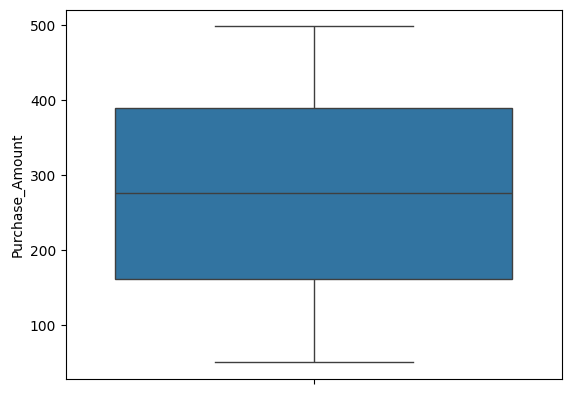

In [29]:
sns.boxplot(df["Purchase_Amount"])    # Visualizando a distribuição dos dados

# Importando CSV

In [15]:
# df.to_csv("df_analise_por_segmento_clientes.csv", index=False)

In [16]:
# from google.colab import files

In [17]:
# files.download("df_analise_por_segmento_clientes.csv")